In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x=np.random.uniform(-3,3,size=100)
X=x.reshape(-1,1)
y=0.5 * x**2 + x + 2 + np.random.normal(0,1,size=100)

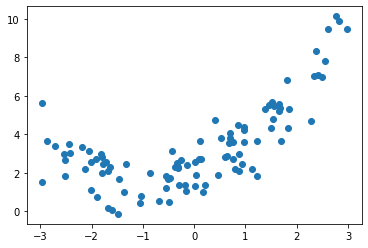

In [3]:
plt.scatter(x,y)
plt.show()

<font color=black size=5 face=雅黑>**使用线性回归**</font>

In [21]:
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()
lin_reg.fit(X,y)
lin_reg.score(X,y)

0.4461423762675819

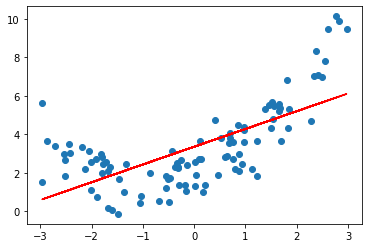

In [22]:
y_predict=lin_reg.predict(X)
plt.scatter(x,y)
plt.plot(x,y_predict,color='r')
plt.show()

In [23]:
from sklearn.metrics import mean_squared_error

y_predict=lin_reg.predict(X)
mean_squared_error(y,y_predict)

2.6218955233281154

<font color=black size=5 face=雅黑>**使用多项式回归**</font>

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

def PolynomialRegression(degree):
    return Pipeline([
        ("poly",PolynomialFeatures(degree=degree)),
        ("std_scaler",StandardScaler()),
        ('lin_reg',LinearRegression())
    ])

In [34]:
poly_reg2=PolynomialRegression(degree=2)
poly_reg2.fit(X,y)

Pipeline(steps=[('poly', PolynomialFeatures()),
                ('std_scaler', StandardScaler()),
                ('lin_reg', LinearRegression())])

In [35]:
y_predict2=poly_reg.predict(X)
mean_squared_error(y,y_predict2)

0.8862849130493027

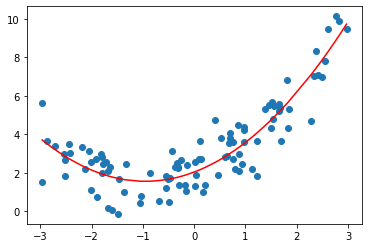

In [36]:
plt.scatter(x,y)
plt.plot(np.sort(x),y_predict2[np.argsort(x)],color='r')
plt.show()

In [39]:
#degree=10
poly_reg10=PolynomialRegression(degree=10)
poly_reg10.fit(X,y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=10)),
                ('std_scaler', StandardScaler()),
                ('lin_reg', LinearRegression())])

In [40]:
y_predict10=poly_reg10.predict(X)
mean_squared_error(y,y_predict10)

0.7987382292459686

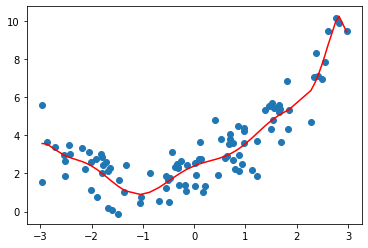

In [41]:
plt.scatter(x,y)
plt.plot(np.sort(x),y_predict10[np.argsort(x)],color='r')
plt.show()

In [42]:
#degree=100
poly_reg100=PolynomialRegression(degree=100)
poly_reg100.fit(X,y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=100)),
                ('std_scaler', StandardScaler()),
                ('lin_reg', LinearRegression())])

In [44]:
y_predict100=poly_reg100.predict(X)
mean_squared_error(y,y_predict100)

0.4710045018586138

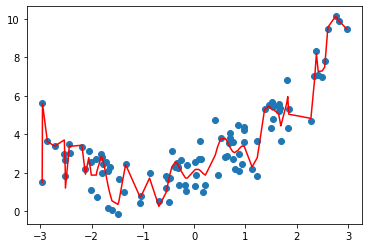

In [45]:
plt.scatter(x,y)
plt.plot(np.sort(x),y_predict100[np.argsort(x)],color='r')
plt.show()

过拟和：泛化能力差

<font color=black size=5 face=雅黑>**train test split(overfitting and underfitting)**</font>

In [50]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [51]:
#线性回归
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
y2_predict=lin_reg.predict(X_test)
mean_squared_error(y_test,y2_predict)

2.2724970731594865

In [52]:
#多项式回归 degree=2
poly2_reg=PolynomialRegression(degree=2)
poly2_reg.fit(X_train,y_train)
y2_predict=poly2_reg.predict(X_test)
mean_squared_error(y_test,y2_predict)

0.6958252056315162

In [53]:
#多项式回归 degree=10
poly10_reg=PolynomialRegression(degree=10)
poly10_reg.fit(X_train,y_train)
y10_predict=poly10_reg.predict(X_test)
mean_squared_error(y_test,y10_predict)

0.8302194190797288

虽然degree=10更好地拟合了训练数据集，但面对新的数据是最差的，说明泛化能力差

欠拟合：算法所训练的模型不能完整表达数据关系

过拟合：算法所训练的模型过多地表达了数据间的噪音关系

<font color=black size=5 face=雅黑>**学习曲线**</font>

In [54]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=10)

In [65]:
X_train.shape

(75, 1)

In [67]:
#线性回归的学习曲线
train_score=[]
test_score=[]

for i in range(1,76):
    lin_reg = LinearRegression()
    lin_reg.fit(X_train[:i],y_train[:i])
    
    y_train_predict=lin_reg.predict(X_train[:i])
    train_score.append(mean_squared_error(y_train[:i],y_train_predict))
    
    y_test_predict=lin_reg.predict(X_test)
    test_score.append(mean_squared_error(y_test,y_test_predict))

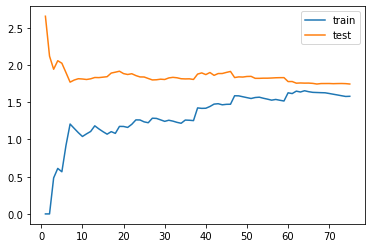

In [73]:
plt.plot([i for i in range(1,76)],np.sqrt(train_score),label='train')
plt.plot([i for i in range(1,76)],np.sqrt(test_score),label='test')
plt.legend()
plt.show()

In [90]:
def plot_learning_curve(algo,X_train,X_test,y_train,y_test):
    train_score=[]
    test_score=[]
    
    for i in range(1,len(X_train)+1):
        algo.fit(X_train[:i],y_train[:i])
    
        y_train_predict=algo.predict(X_train[:i])
        train_score.append(mean_squared_error(y_train[:i],y_train_predict))
    
        y_test_predict=algo.predict(X_test)
        test_score.append(mean_squared_error(y_test,y_test_predict))
        
        
    plt.plot([i for i in range(1,len(X_train)+1)],np.sqrt(train_score),label='train')
    plt.plot([i for i in range(1,len(X_train)+1)],np.sqrt(test_score),label='test')
    plt.legend()
    plt.axis([0,len(X_train)+1,0,4])
    plt.show()

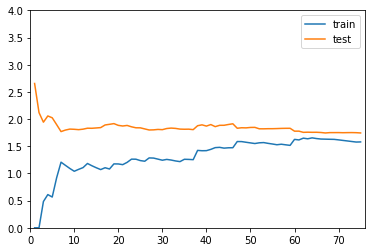

In [91]:
#线性回归
plot_learning_curve( LinearRegression(),X_train,X_test,y_train,y_test)

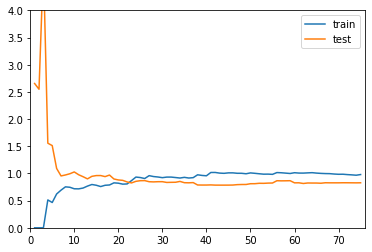

In [92]:
#二阶多项式回归 --最佳
poly_reg2=PolynomialRegression(degree=2)
plot_learning_curve(poly_reg2,X_train,X_test,y_train,y_test)

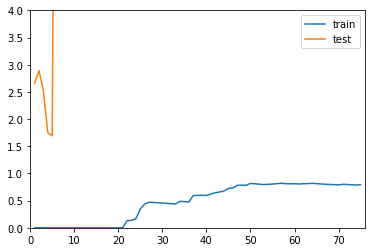

In [97]:
#二十阶多项式回归 -- 过拟合
poly_reg20=PolynomialRegression(degree=20) 
plot_learning_curve( poly_reg20,X_train,X_test,y_train,y_test)